Документация по пакету lifelines
https://lifelines.readthedocs.io/en/latest/

In [ ]:
!pip install lifelines

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.4/409.4 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.3/82.3 kB 6.1 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=2edd46cd31e5e09e1d73eafe6ac902cb87107645c89270a929605c780f58dd62
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


# Часть 1

Почему учет цензурированных случаев важен?

Распространенная ошибка заключается в том, что при анализе данных игнорируются наблюдения (те элементы выборки), для которых терминальное событие не наступило.

Рассмотрим случай, когда популяция фактически состоит из двух субпопуляций, $A$ и $B$.
* субпопуляция $A$ имеет очень маленькую продолжительность жизни, например, в среднем 2 года,
* субпопуляция $B$ имеет гораздо большую продолжительность жизни, скажем, в среднем 12 лет.

Мы не знаем этого различия заранее. При $t=10$, мы хотим исследовать среднюю продолжительность жизни для всей популяции.

На рисунке красными линиями обозначена продолжительность жизни особей, у которых наблюдалось терминальное событие, а синими линиями обозначена продолжительность жизни особей, для которых терминальное событие не наблюдалось (цензурированных справа).

Если необходимо оценить среднюю продолжительность жизни в данной популяции, и мы наивно решим не включать особей сензурированных справо, то мы, очевидно, недооценим истинную среднюю продолжительность жизни. То есть полученная оценка будет смещенной (*англ*. biased) влево.

Observed lifetimes at time 10:
 [10.          4.32015306  1.16260646  5.08771778  9.2875173  10.
 10.         10.          9.81608777  2.64927869  6.90045442 10.
  4.50011173  0.47805454 10.          6.55966439  1.52356003  0.75817894
  3.59908744 10.          2.75796753 10.          7.12817237  0.69518732
  1.67153891]


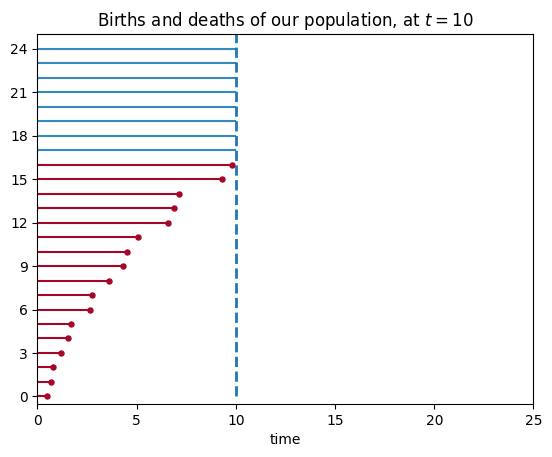

In [ ]:
from lifelines.plotting import plot_lifetimes
import numpy as np
from numpy.random import uniform, exponential

np.random.seed(1)
N = 25

CURRENT_TIME = 10

actual_lifetimes = np.array([
    exponential(12) if (uniform() < 0.5) else exponential(2) for i in range(N)
])
observed_lifetimes = np.minimum(actual_lifetimes, CURRENT_TIME)
death_observed = actual_lifetimes < CURRENT_TIME

ax = plot_lifetimes(observed_lifetimes, event_observed=death_observed)

ax.set_xlim(0, 25)
ax.vlines(10, 0, 30, lw=2, linestyles='--')
ax.set_xlabel("time")
ax.set_title("Births and deaths of our population, at $t=10$")
print("Observed lifetimes at time %d:\n" % (CURRENT_TIME), observed_lifetimes)

In [ ]:
print(np.sort(actual_lifetimes.round(2)))

[ 0.48  0.7   0.76  1.16  1.52  1.67  2.65  2.76  3.6   4.32  4.5   5.09
  6.56  6.9   7.13  9.29  9.82 13.32 13.87 14.14 15.29 16.64 18.69 25.26
 25.26]


(0.0, 30.0)

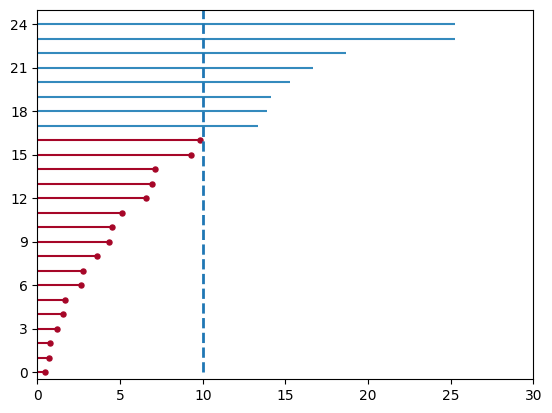

In [ ]:
ax = plot_lifetimes(actual_lifetimes, event_observed=death_observed)
ax.vlines(10, 0, 30, lw=2, linestyles='--')
ax.set_xlim(0, 30)

In [ ]:
import numpy as np
import pandas as pd
from lifelines import KaplanMeierFitter
from lifelines import CoxPHFitter
import matplotlib.pyplot as plt

from lifelines.datasets import load_dd

data = load_dd()
data.head()

,ctryname,cowcode2,politycode,un_region_name,un_continent_name,ehead,leaderspellreg,democracy,regime,start_year,duration,observed
0,Afghanistan,700,700.0,Southern Asia,Asia,Mohammad Zahir Shah,Mohammad Zahir Shah.Afghanistan.1946.1952.Mona...,Non-democracy,Monarchy,1946,7,1
1,Afghanistan,700,700.0,Southern Asia,Asia,Sardar Mohammad Daoud,Sardar Mohammad Daoud.Afghanistan.1953.1962.Ci...,Non-democracy,Civilian Dict,1953,10,1
2,Afghanistan,700,700.0,Southern Asia,Asia,Mohammad Zahir Shah,Mohammad Zahir Shah.Afghanistan.1963.1972.Mona...,Non-democracy,Monarchy,1963,10,1
3,Afghanistan,700,700.0,Southern Asia,Asia,Sardar Mohammad Daoud,Sardar Mohammad Daoud.Afghanistan.1973.1977.Ci...,Non-democracy,Civilian Dict,1973,5,0
4,Afghanistan,700,700.0,Southern Asia,Asia,Nur Mohammad Taraki,Nur Mohammad Taraki.Afghanistan.1978.1978.Civi...,Non-democracy,Civilian Dict,1978,1,0


In [ ]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()

In [ ]:
T = data["duration"]
E = data["observed"]

kmf.fit(T, event_observed=E)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 1808 total observations, 340 right-censored observations>

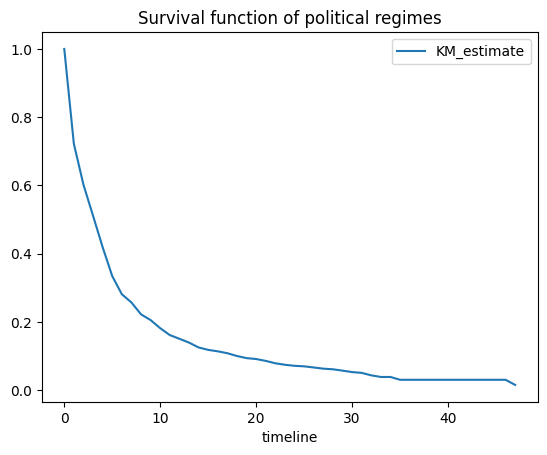

In [ ]:
from matplotlib import pyplot as plt


kmf.survival_function_.plot()
plt.title('Survival function of political regimes');

<Axes: xlabel='timeline'>

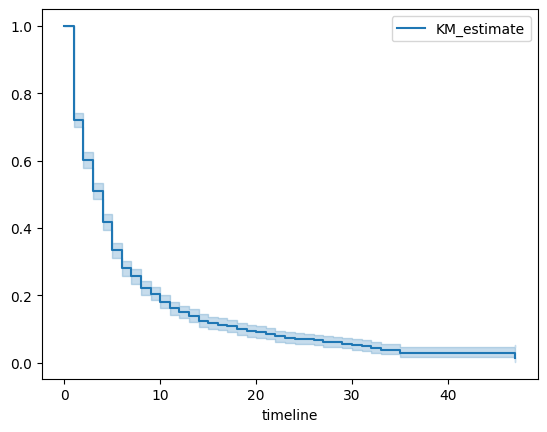

In [ ]:
kmf.plot_survival_function()

In [ ]:
kmf.median_survival_time_

4.0

In [ ]:
from lifelines.utils import median_survival_times
median_ci = median_survival_times(kmf.confidence_interval_)

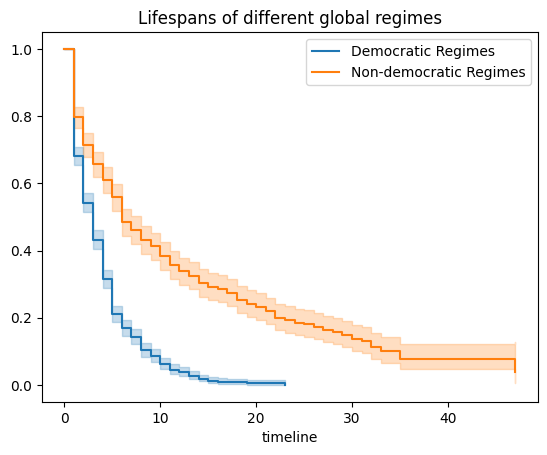

In [ ]:
ax = plt.subplot(111)

dem = (data["democracy"] == "Democracy")

kmf.fit(T[dem], event_observed=E[dem], label="Democratic Regimes")
kmf.plot_survival_function(ax=ax)

kmf.fit(T[~dem], event_observed=E[~dem], label="Non-democratic Regimes")
kmf.plot_survival_function(ax=ax)

plt.title("Lifespans of different global regimes");

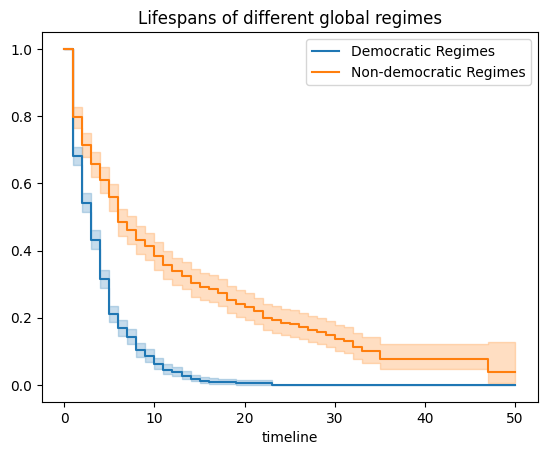

In [ ]:
import numpy as np

ax = plt.subplot(111)

t = np.linspace(0, 50, 51)
kmf.fit(T[dem], event_observed=E[dem], timeline=t, label="Democratic Regimes")
ax = kmf.plot_survival_function(ax=ax)

kmf.fit(T[~dem], event_observed=E[~dem], timeline=t, label="Non-democratic Regimes")
ax = kmf.plot_survival_function(ax=ax)

plt.title("Lifespans of different global regimes");

In [ ]:
from lifelines.statistics import logrank_test

results = logrank_test(T[dem], T[~dem], E[dem], E[~dem], alpha=.99)

results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.99
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
         260.47 <0.005    192.23

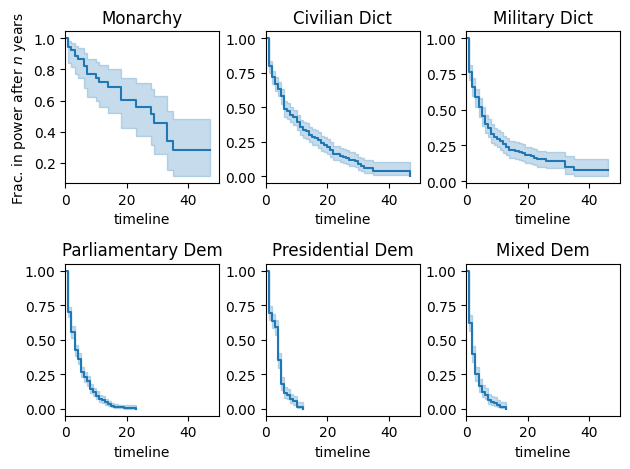

In [ ]:
regime_types = data['regime'].unique()

for i, regime_type in enumerate(regime_types):
    ax = plt.subplot(2, 3, i + 1)

    ix = data['regime'] == regime_type
    kmf.fit(T[ix], E[ix], label=regime_type)
    kmf.plot_survival_function(ax=ax, legend=False)

    plt.title(regime_type)
    plt.xlim(0, 50)

    if i==0:
        plt.ylabel('Frac. in power after $n$ years')

plt.tight_layout()

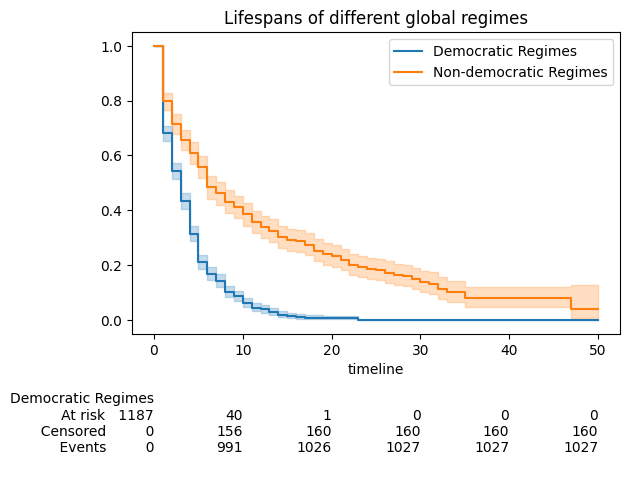

In [ ]:
ax = plt.subplot(111)

t = np.linspace(0, 50, 51)
kmf.fit(T[dem], event_observed=E[dem], timeline=t, label="Democratic Regimes")
ax = kmf.plot_survival_function(ax=ax, at_risk_counts=True)

kmf.fit(T[~dem], event_observed=E[~dem], timeline=t, label="Non-democratic Regimes")
ax = kmf.plot_survival_function(ax=ax)

plt.title("Lifespans of different global regimes");